# Cohort Analysis

In [ ]:
import pandas as pd
df = pd.read_csv('transaction_data.csv').drop(columns=['Unnamed: 0'])
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,transaction_id,product_id,CustomerID,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,InvoiceDate
0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-25
1,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-21
2,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-16
3,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-31
4,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19440,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,2017-06-24
19441,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,2017-11-09
19442,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,2017-04-14
19443,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,2017-07-03


## Data Preprocessing

In [ ]:
# ubah format ke date
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19445 entries, 0 to 19444
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   CustomerID               19445 non-null  int64         
 3   transaction_date         19445 non-null  object        
 4   online_order             19445 non-null  object        
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

## a. Acquisition Date / Cohort (Bulan user mendaftar)
(AWAL MENDAFTAR)

In [ ]:
# mengekstrak bulan dari invoice date
df['InvoiceDate'].dt.month

,InvoiceDate
0,2
1,5
2,10
3,8
4,10
...,...
19440,6
19441,11
19442,4
19443,7


In [ ]:
# mengekstrak tahun bulan dari invoice date
df['InvoiceDate'].dt.to_period('M')

,InvoiceDate
0,2017-02
1,2017-05
2,2017-10
3,2017-08
4,2017-10
...,...
19440,2017-06
19441,2017-11
19442,2017-04
19443,2017-07


In [ ]:
# untuk mengetahui date acquisiton / awal mula belanja setiap customer ID
df.groupby('CustomerID')['InvoiceDate'].min()

,InvoiceDate
CustomerID,
1,2017-01-05
2,2017-05-04
3,2017-02-23
4,2017-04-03
5,2017-03-03
...,...
3497,2017-09-01
3498,2017-02-03
3499,2017-01-12


In [ ]:
# seperti group by tapi baris data nya dipertahankan (kl di sql kayak over)
df.groupby('CustomerID')['InvoiceDate'].transform('min')

,InvoiceDate
0,2017-02-25
1,2017-01-20
2,2017-01-29
3,2017-02-08
4,2017-01-24
...,...
19440,2017-01-25
19441,2017-01-03
19442,2017-04-06
19443,2017-02-27


In [ ]:
# masukin ke dalam data
df['Acquisiton_Date']= df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')
df

,transaction_id,product_id,CustomerID,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,InvoiceDate,Acquisiton_Date
0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-25,2017-02
1,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-21,2017-01
2,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-16,2017-01
3,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-31,2017-02
4,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01,2017-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19440,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,2017-06-24,2017-01
19441,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,2017-11-09,2017-01
19442,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,2017-04-14,2017-04
19443,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,2017-07-03,2017-02


In [ ]:
df['Acquisiton_Date'].value_counts()

,count
Acquisiton_Date,
2017-01,8254
2017-02,4694
2017-03,2651
2017-04,1756
2017-05,954
2017-06,537
2017-07,299
2017-08,163
2017-09,60


## b.Transaction Month

In [ ]:
df['Transaction Month'] = df['InvoiceDate'].dt.to_period('M')
df

,transaction_id,product_id,CustomerID,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,InvoiceDate,Acquisiton_Date,Transaction Month
0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-25,2017-02,2017-02
1,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-21,2017-01,2017-05
2,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-16,2017-01,2017-10
3,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-31,2017-02,2017-08
4,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01,2017-01,2017-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19440,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,2017-06-24,2017-01,2017-06
19441,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,2017-11-09,2017-01,2017-11
19442,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,2017-04-14,2017-04,2017-04
19443,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,2017-07-03,2017-02,2017-07


## c.Jumlah user setiap acsqsution date (New Users)

In [ ]:
cohort_table = df.groupby(['Acquisiton_Date','Transaction Month'])['CustomerID'].nunique()
cohort_table = cohort_table.rename('Jumlah User', inplace=True).reset_index()
cohort_table

,Acquisiton_Date,Transaction Month,Jumlah User
0,2017-01,2017-01,1321
1,2017-01,2017-02,464
2,2017-01,2017-03,477
3,2017-01,2017-04,483
4,2017-01,2017-05,480
...,...,...,...
73,2017-10,2017-11,6
74,2017-10,2017-12,8
75,2017-11,2017-11,15
76,2017-11,2017-12,6


In [ ]:
cohort_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype    
---  ------             --------------  -----    
 0   Acquisiton_Date    78 non-null     period[M]
 1   Transaction Month  78 non-null     period[M]
 2   Jumlah User        78 non-null     int64    
dtypes: int64(1), period[M](2)
memory usage: 2.0 KB


## d.Period Month

In [ ]:
cohort_table['Period Month'] = cohort_table['Transaction Month'].dt.month - cohort_table['Acquisiton_Date'].dt.month
cohort_table

,Acquisiton_Date,Transaction Month,Jumlah User,Period Month
0,2017-01,2017-01,1321,0
1,2017-01,2017-02,464,1
2,2017-01,2017-03,477,2
3,2017-01,2017-04,483,3
4,2017-01,2017-05,480,4
...,...,...,...,...
73,2017-10,2017-11,6,1
74,2017-10,2017-12,8,2
75,2017-11,2017-11,15,0
76,2017-11,2017-12,6,1


In [ ]:
cohort_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype    
---  ------             --------------  -----    
 0   Acquisiton_Date    78 non-null     period[M]
 1   Transaction Month  78 non-null     period[M]
 2   Jumlah User        78 non-null     int64    
 3   Period Month       78 non-null     int64    
dtypes: int64(2), period[M](2)
memory usage: 2.6 KB


In [ ]:
cohort_pivot = cohort_table.pivot_table(index='Acquisiton_Date', columns='Period Month', values='Jumlah User')
cohort_pivot

Period Month,0,1,2,3,4,5,6,7,8,9,10,11
Acquisiton_Date,,,,,,,,,,,,
2017-01,1321.0,464.0,477.0,483.0,480.0,462.0,493.0,502.0,479.0,501.0,471.0,494.0
2017-02,794.0,310.0,291.0,306.0,277.0,291.0,303.0,275.0,322.0,297.0,282.0,NaN
2017-03,490.0,169.0,171.0,165.0,179.0,184.0,168.0,206.0,184.0,186.0,NaN,NaN
2017-04,341.0,110.0,119.0,155.0,142.0,123.0,141.0,124.0,132.0,NaN,NaN,NaN
2017-05,214.0,87.0,77.0,86.0,70.0,73.0,72.0,81.0,NaN,NaN,NaN,NaN
2017-06,128.0,49.0,46.0,51.0,49.0,47.0,52.0,NaN,NaN,NaN,NaN,NaN
2017-07,83.0,29.0,31.0,33.0,39.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,54.0,18.0,23.0,18.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,25.0,7.0,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Ubah jumlah user menjadi presentase

In [ ]:
cohort_pivot_per = cohort_pivot.apply(lambda x: x/x.iloc[0]*100, axis = 1)
cohort_pivot_per

Period Month,0,1,2,3,4,5,6,7,8,9,10,11
Acquisiton_Date,,,,,,,,,,,,
2017-01,100.0,35.124905,36.109008,36.563210,36.336109,34.973505,37.320212,38.001514,36.260409,37.925814,35.654807,37.395912
2017-02,100.0,39.042821,36.649874,38.539043,34.886650,36.649874,38.161209,34.634761,40.554156,37.405542,35.516373,NaN
2017-03,100.0,34.489796,34.897959,33.673469,36.530612,37.551020,34.285714,42.040816,37.551020,37.959184,NaN,NaN
2017-04,100.0,32.258065,34.897361,45.454545,41.642229,36.070381,41.348974,36.363636,38.709677,NaN,NaN,NaN
2017-05,100.0,40.654206,35.981308,40.186916,32.710280,34.112150,33.644860,37.850467,NaN,NaN,NaN,NaN
2017-06,100.0,38.281250,35.937500,39.843750,38.281250,36.718750,40.625000,NaN,NaN,NaN,NaN,NaN
2017-07,100.0,34.939759,37.349398,39.759036,46.987952,30.120482,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,100.0,33.333333,42.592593,33.333333,27.777778,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,100.0,28.000000,32.000000,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cohort_pivot_per.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 12 entries, 2017-01 to 2017-12
Freq: M
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       12 non-null     float64
 1   1       11 non-null     float64
 2   2       10 non-null     float64
 3   3       9 non-null      float64
 4   4       8 non-null      float64
 5   5       7 non-null      float64
 6   6       6 non-null      float64
 7   7       5 non-null      float64
 8   8       4 non-null      float64
 9   9       3 non-null      float64
 10  10      2 non-null      float64
 11  11      1 non-null      float64
dtypes: float64(12)
memory usage: 1.2 KB


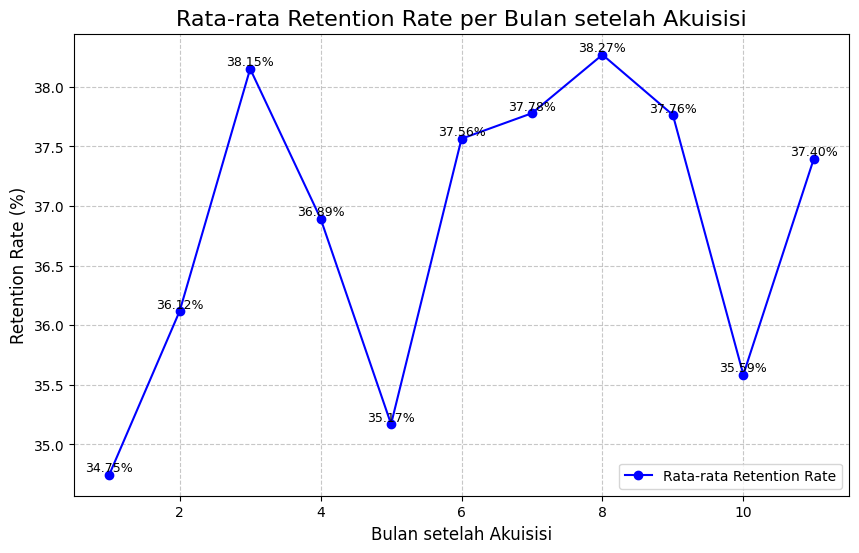

In [ ]:
import pandas as pd
import numpy as np

# Hitung rata-rata retensi per bulan
average_retention = cohort_pivot_per.iloc[:, 1:].mean(axis=0)

# Data untuk grafik
months = np.arange(1, len(average_retention) + 1)  # Bulan 1, 2, 3, dst.
retention_rates = average_retention.values  # Rata-rata retention rate

# Buat grafik garis
plt.figure(figsize=(10, 6))
plt.plot(months, retention_rates, marker='o', linestyle='-', color='b', label='Rata-rata Retention Rate')

# Tambahkan judul dan label
plt.title('Rata-rata Retention Rate per Bulan setelah Akuisisi', fontsize=16)
plt.xlabel('Bulan setelah Akuisisi', fontsize=12)
plt.ylabel('Retention Rate (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Tampilkan label di setiap titik
for i, rate in enumerate(retention_rates):
    plt.text(months[i], rate, f'{rate:.2f}%', ha='center', va='bottom', fontsize=9)

# Tampilkan legenda
plt.legend()
plt.savefig('rata-rata retention rate.png')
# Tampilkan grafik
plt.show()

Rata-rata Retention Rate per Bulan:
Period Month
0     100.00
1      34.75
2      36.12
3      38.15
4      36.89
5      35.17
6      37.56
7      37.78
8      38.27
9      37.76
10     35.59
11     37.40
dtype: float64

Rata-rata Retention Rate keseluruhan: 46.38%


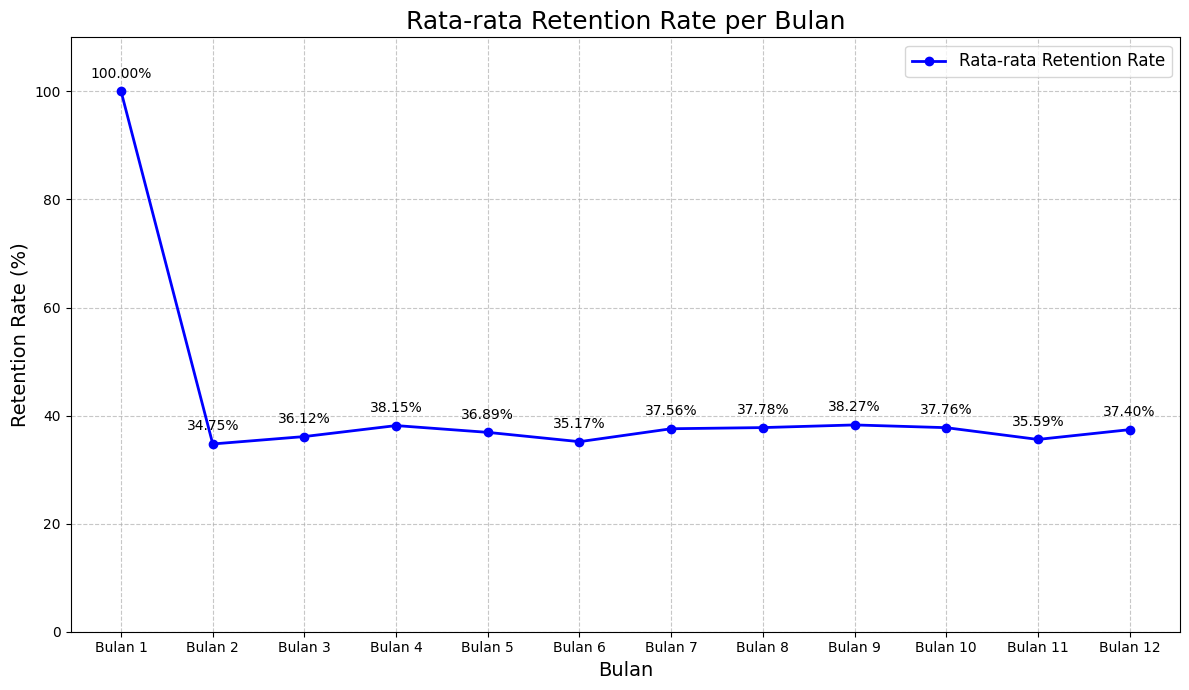

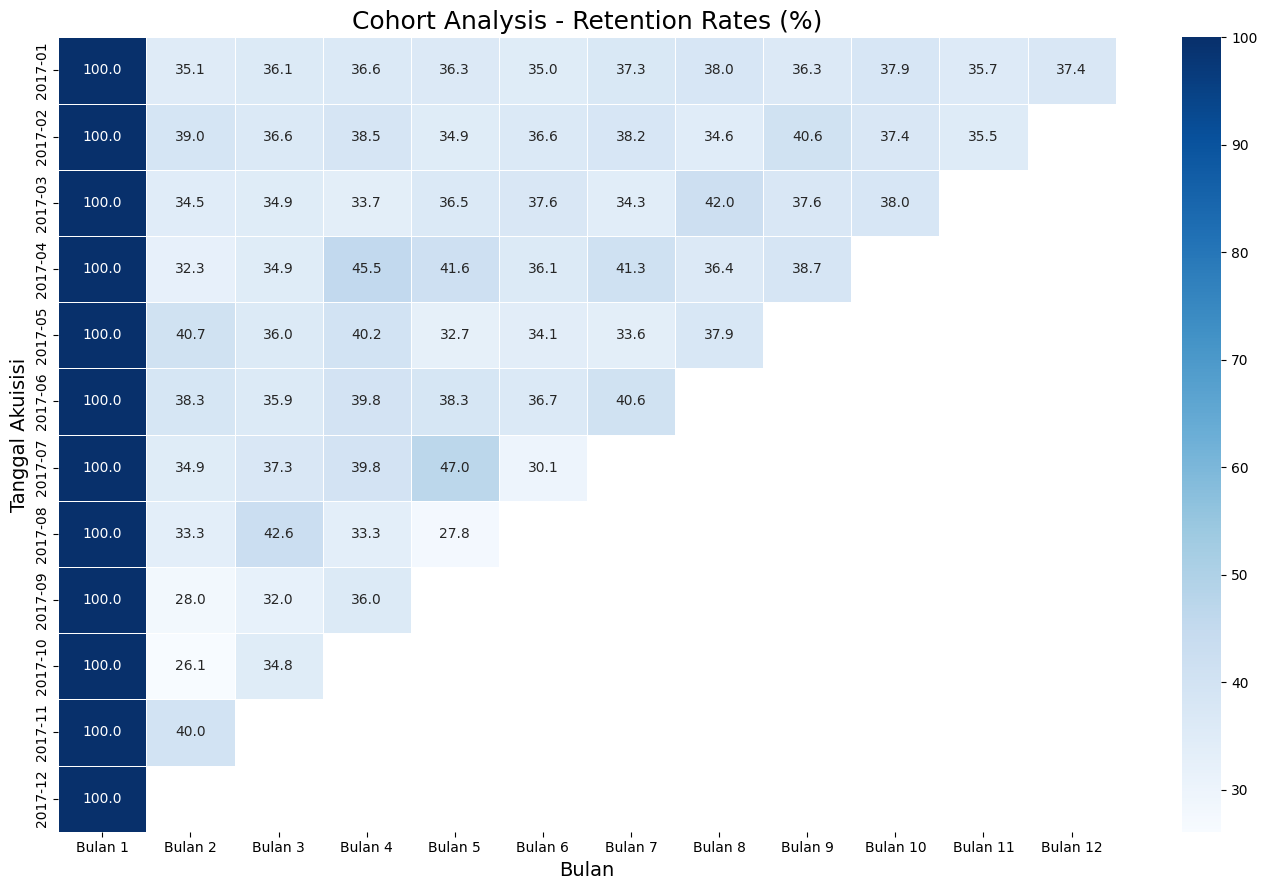

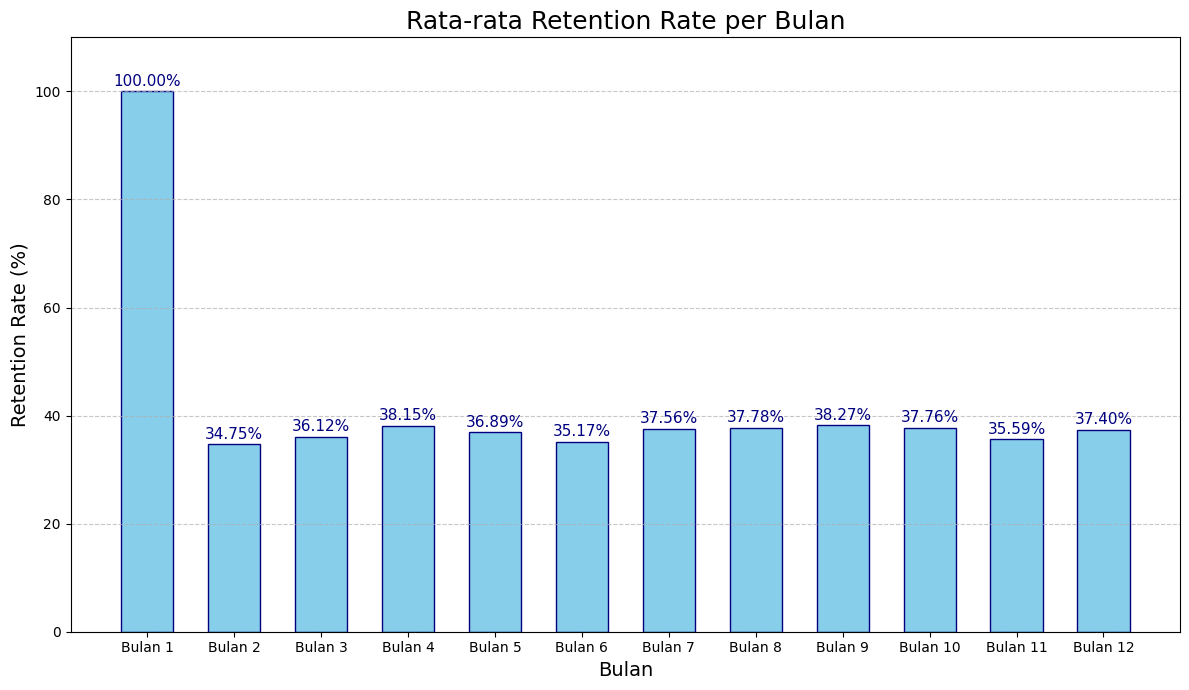


Persentase Retention Keseluruhan per Bulan:
Bulan 1: 100.0%
Bulan 2: 91.67%
Bulan 3: 83.33%
Bulan 4: 75.0%
Bulan 5: 66.67%
Bulan 6: 58.33%
Bulan 7: 50.0%
Bulan 8: 41.67%
Bulan 9: 33.33%
Bulan 10: 25.0%
Bulan 11: 16.67%
Bulan 12: 8.33%


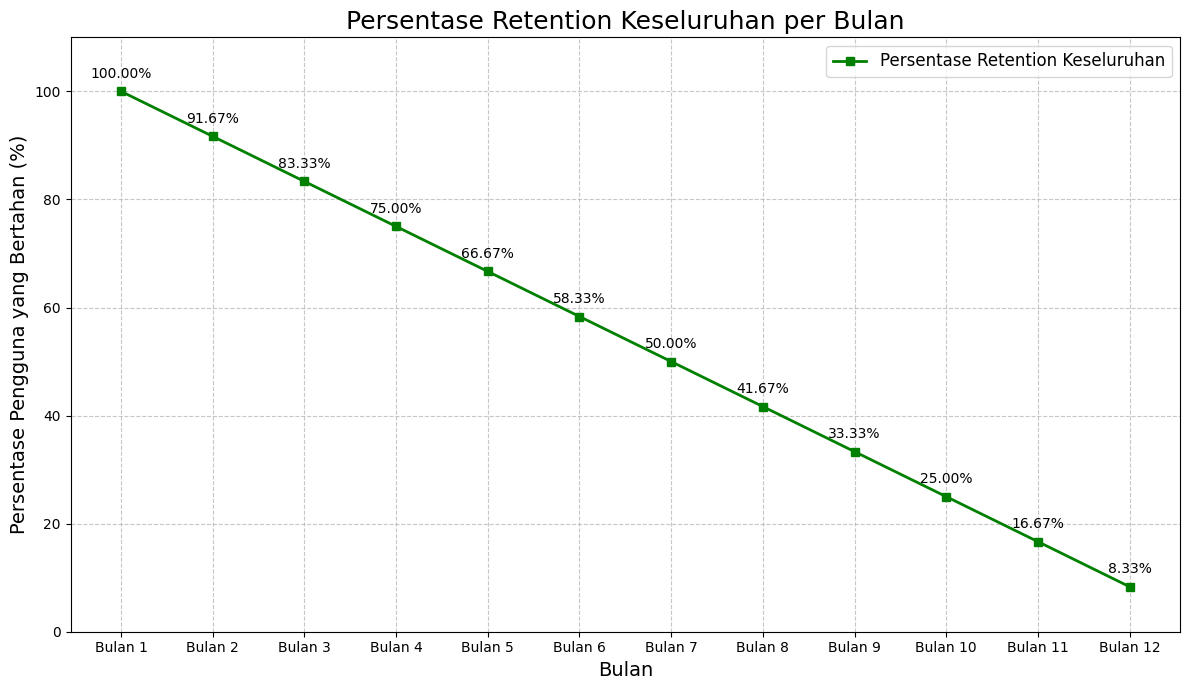


Perbandingan Retention Rate Rata-rata vs Keseluruhan:
       Bulan  Rata-rata Retention (%)  Retention Keseluruhan (%)
0    Bulan 1                   100.00                     100.00
1    Bulan 2                    34.75                      91.67
2    Bulan 3                    36.12                      83.33
3    Bulan 4                    38.15                      75.00
4    Bulan 5                    36.89                      66.67
5    Bulan 6                    35.17                      58.33
6    Bulan 7                    37.56                      50.00
7    Bulan 8                    37.78                      41.67
8    Bulan 9                    38.27                      33.33
9   Bulan 10                    37.76                      25.00
10  Bulan 11                    35.59                      16.67
11  Bulan 12                    37.40                       8.33


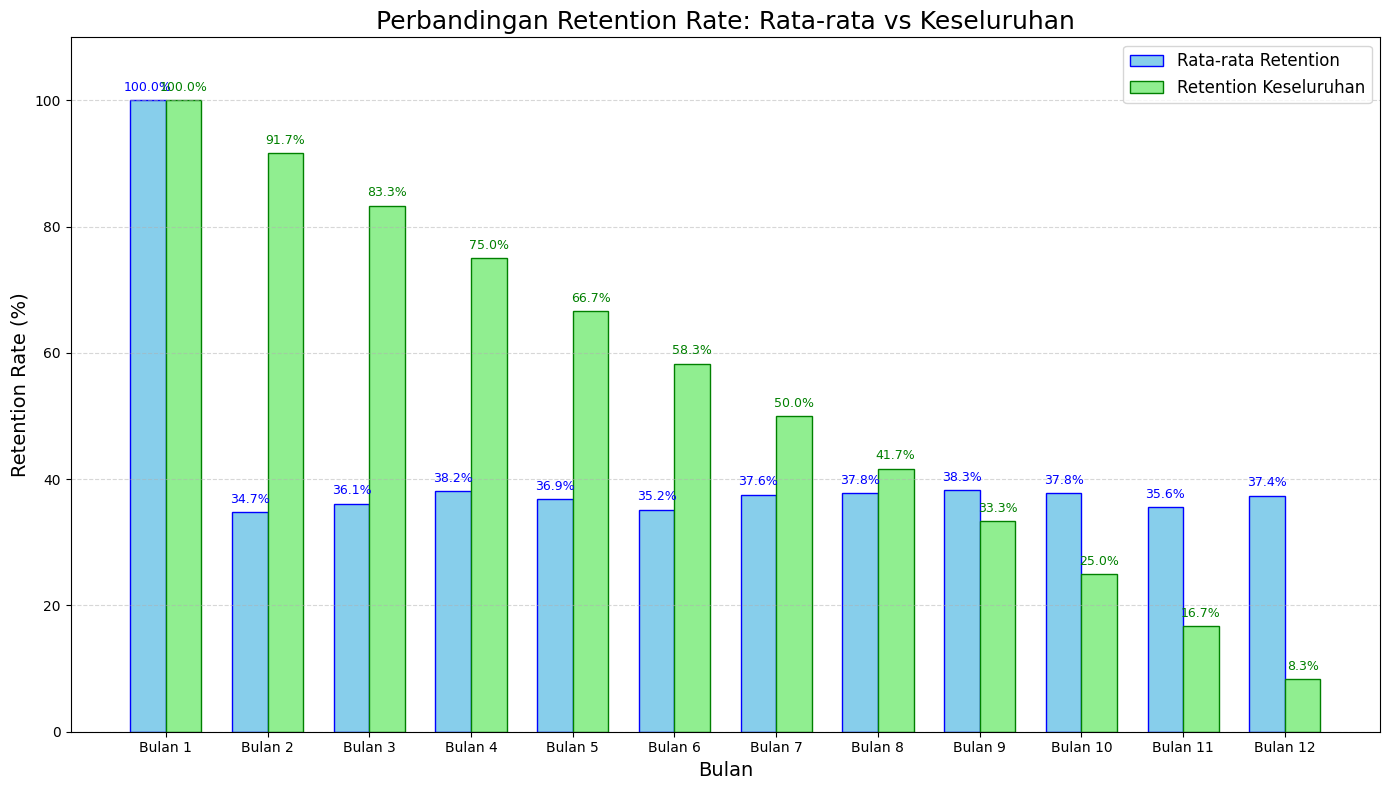

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Asumsikan cohort_pivot_per sudah tersedia

# Buat salinan data untuk manipulasi
cohort_data = cohort_pivot_per.copy()

# Hitung rata-rata retensi untuk setiap bulan
average_retention = cohort_data.mean(axis=0)

# Cetak rata-rata retensi
print("Rata-rata Retention Rate per Bulan:")
print(average_retention.round(2))

# Hitung rata-rata keseluruhan retention rate dengan menghindari nilai NaN
# Memperbaiki masalah NaN dengan menggunakan numpy.nanmean
overall_average_retention = np.nanmean(cohort_data.values)

# Cetak hasil rata-rata keseluruhan
print(f"\nRata-rata Retention Rate keseluruhan: {overall_average_retention:.2f}%")

# Buat daftar label bulan 1-12 untuk digunakan pada visualisasi
month_labels = [f'Bulan {i+1}' for i in range(len(cohort_data.columns))]

# Buat grafik garis untuk rata-rata retensi
plt.figure(figsize=(12, 7))

# Gunakan index yang disesuaikan dimulai dari 1 untuk sumbu x
months = range(1, len(average_retention) + 1)
plt.plot(months, average_retention.values, marker='o', linestyle='-', color='b', linewidth=2, label='Rata-rata Retention Rate')

# Tambahkan judul dan label
plt.title('Rata-rata Retention Rate per Bulan', fontsize=18)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Retention Rate (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Tampilkan label di setiap titik
for i, rate in enumerate(average_retention.values):
    plt.text(months[i], rate + 2, f'{rate:.2f}%', ha='center', va='bottom', fontsize=10)

# Atur sumbu x agar hanya menampilkan angka bulat
plt.xticks(months, month_labels)

# Atur batasan sumbu y untuk memperbaiki visualisasi
plt.ylim(0, 110)

# Tampilkan legenda
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Rata-rata Retentio.png')
plt.show()

# Visualisasi heatmap cohort dengan label bulan 1-12
plt.figure(figsize=(14, 9))
ax = sns.heatmap(cohort_data, annot=True, cmap="Blues", fmt=".1f", linewidths=.5)
plt.title('Cohort Analysis - Retention Rates (%)', fontsize=18)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Tanggal Akuisisi', fontsize=14)

# Setel label x ke Bulan 1-12
ax.set_xticklabels(month_labels)

plt.tight_layout()
plt.savefig('heatmap cohort.png')
plt.show()

# Visualisasi rata-rata retensi dengan bar chart
plt.figure(figsize=(12, 7))
plt.bar(months, average_retention.values, color='skyblue', edgecolor='navy', width=0.6)
plt.title('Rata-rata Retention Rate per Bulan', fontsize=18)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Retention Rate (%)', fontsize=14)
plt.xticks(months, month_labels)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan nilai di atas setiap bar
for i, rate in enumerate(average_retention.values):
    plt.text(months[i], rate + 1, f'{rate:.2f}%', ha='center', fontsize=11, color='navy')

plt.ylim(0, 110)
plt.tight_layout()
plt.show()

# Hitung data kumulatif retensi - persentase retensi keseluruhan per bulan
# Ini menghitung berapa persentase pengguna yang masih aktif di bulan tertentu dibandingkan bulan pertama
cohort_counts = (~pd.isna(cohort_data)).sum()
cumulative_retention = (cohort_counts / cohort_counts.iloc[0] * 100).round(2)

# Cetak data kumulatif retensi
print("\nPersentase Retention Keseluruhan per Bulan:")
for i, retention in enumerate(cumulative_retention):
    print(f"Bulan {i+1}: {retention}%")

# Visualisasi retensi kumulatif dengan line chart
plt.figure(figsize=(12, 7))
plt.plot(months, cumulative_retention.values, marker='s', linestyle='-', color='green', linewidth=2, label='Persentase Retention Keseluruhan')

# Tambahkan judul dan label
plt.title('Persentase Retention Keseluruhan per Bulan', fontsize=18)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Persentase Pengguna yang Bertahan (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Tampilkan label di setiap titik
for i, rate in enumerate(cumulative_retention.values):
    plt.text(months[i], rate + 2, f'{rate:.2f}%', ha='center', va='bottom', fontsize=10)

# Atur sumbu x agar hanya menampilkan angka bulat
plt.xticks(months, month_labels)

# Atur batasan sumbu y
plt.ylim(0, 110)

# Tampilkan legenda
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Membuat tabel perbandingan retensi rata-rata vs retensi keseluruhan
comparison_data = pd.DataFrame({
    'Bulan': [f'Bulan {i+1}' for i in range(len(average_retention))],
    'Rata-rata Retention (%)': average_retention.values.round(2),
    'Retention Keseluruhan (%)': cumulative_retention.values
})

print("\nPerbandingan Retention Rate Rata-rata vs Keseluruhan:")
print(comparison_data)

# Visualisasi perbandingan dengan bar chart
plt.figure(figsize=(14, 8))
x = np.arange(len(month_labels))
width = 0.35

plt.bar(x - width/2, average_retention.values, width, label='Rata-rata Retention', color='skyblue', edgecolor='blue')
plt.bar(x + width/2, cumulative_retention.values, width, label='Retention Keseluruhan', color='lightgreen', edgecolor='green')

plt.title('Perbandingan Retention Rate: Rata-rata vs Keseluruhan', fontsize=18)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Retention Rate (%)', fontsize=14)
plt.xticks(x, month_labels)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for i, (avg, cum) in enumerate(zip(average_retention.values, cumulative_retention.values)):
    plt.text(i - width/2, avg + 1, f'{avg:.1f}%', ha='center', va='bottom', fontsize=9, color='blue')
    plt.text(i + width/2, cum + 1, f'{cum:.1f}%', ha='center', va='bottom', fontsize=9, color='green')

plt.ylim(0, 110)
plt.tight_layout()
plt.show()

Rata-rata Retention Rate per Bulan:
Period Month
0     100.00
1      34.75
2      36.12
3      38.15
4      36.89
5      35.17
6      37.56
7      37.78
8      38.27
9      37.76
10     35.59
11     37.40
dtype: float64

Rata-rata Retention Rate keseluruhan: nan%


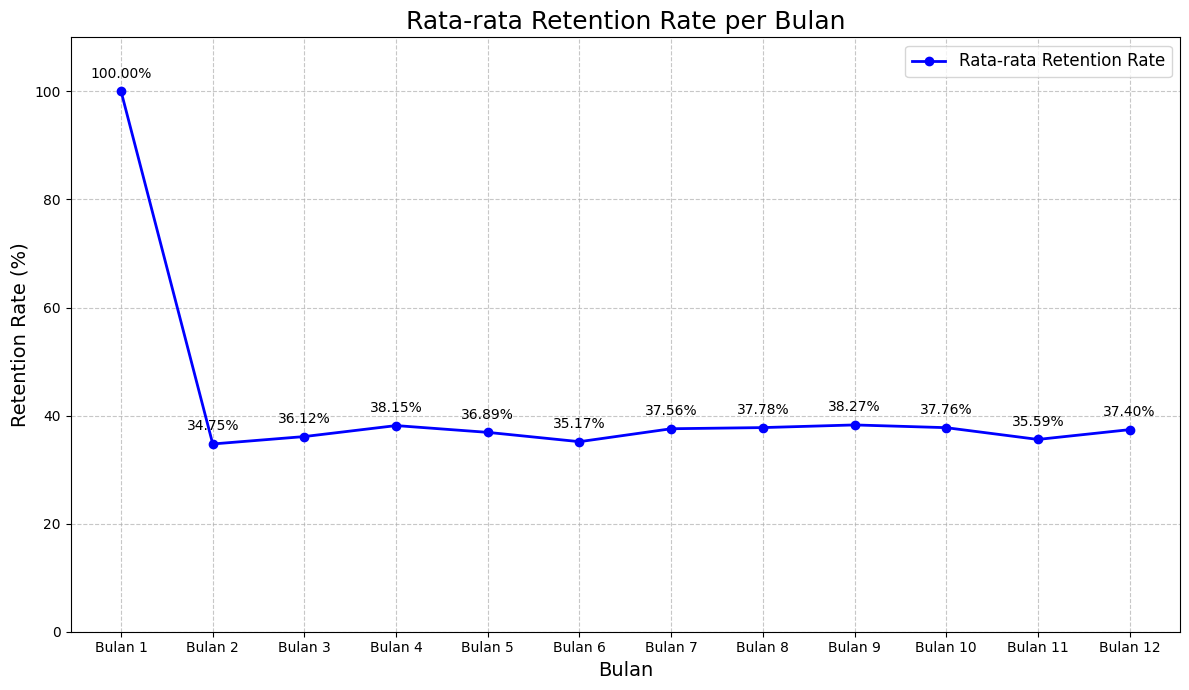

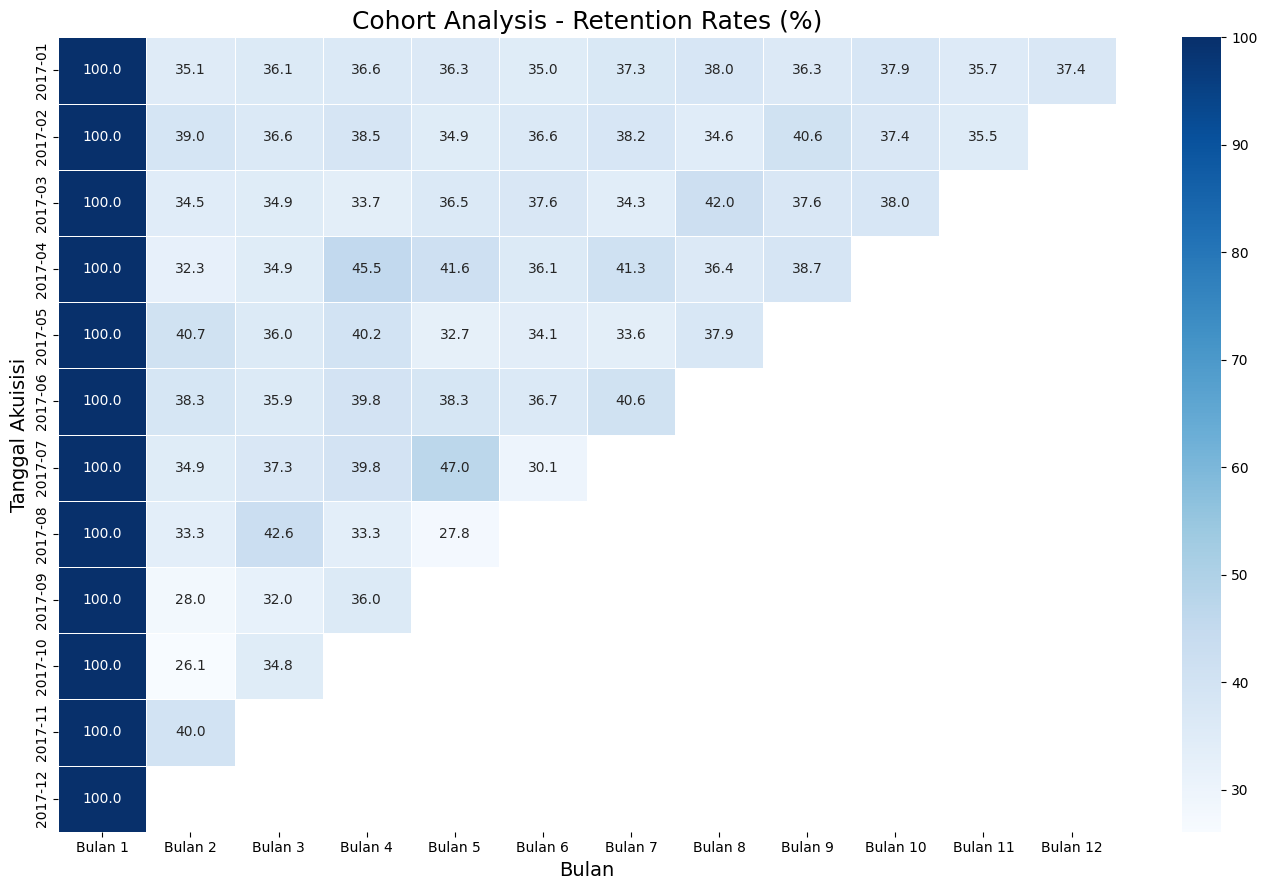

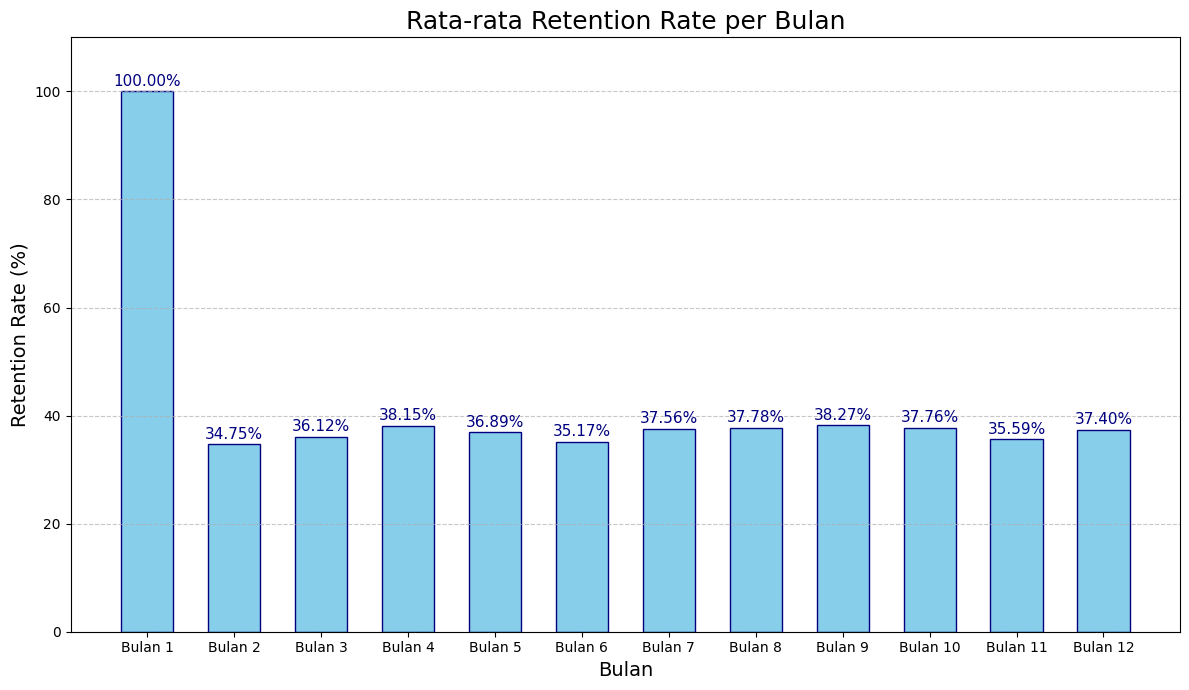


Persentase Retention Keseluruhan per Bulan:
Bulan 1: 100.0%
Bulan 2: 91.67%
Bulan 3: 83.33%
Bulan 4: 75.0%
Bulan 5: 66.67%
Bulan 6: 58.33%
Bulan 7: 50.0%
Bulan 8: 41.67%
Bulan 9: 33.33%
Bulan 10: 25.0%
Bulan 11: 16.67%
Bulan 12: 8.33%


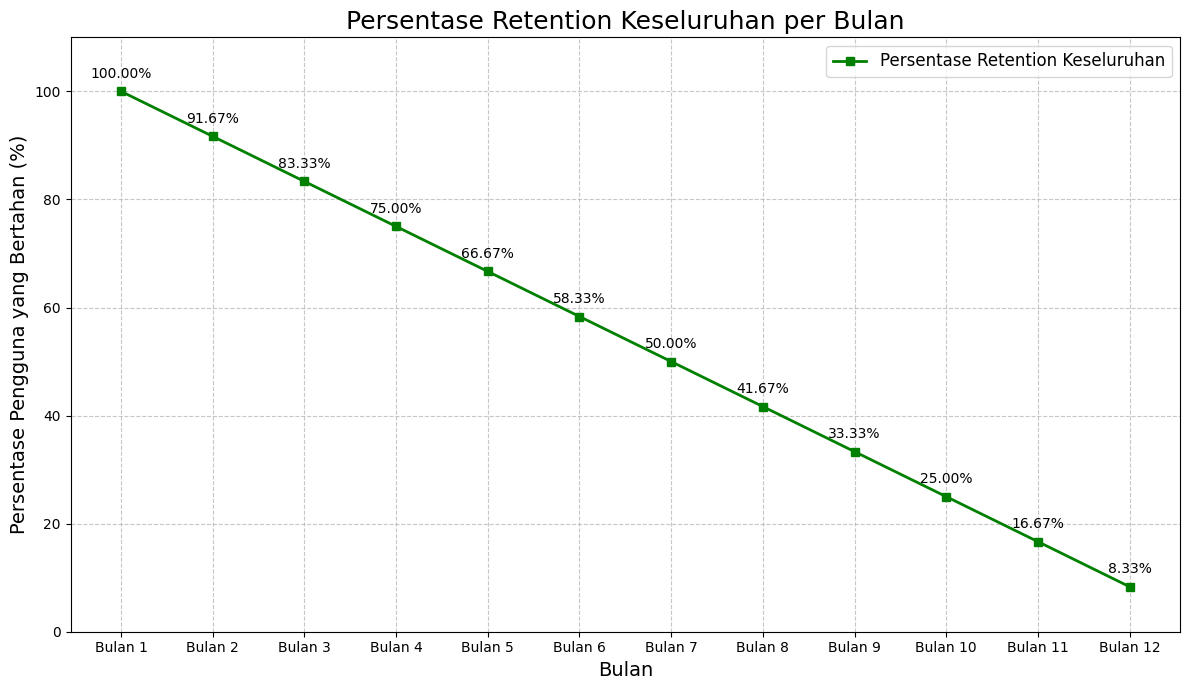


Perbandingan Retention Rate Rata-rata vs Keseluruhan:
       Bulan  Rata-rata Retention (%)  Retention Keseluruhan (%)
0    Bulan 1                   100.00                     100.00
1    Bulan 2                    34.75                      91.67
2    Bulan 3                    36.12                      83.33
3    Bulan 4                    38.15                      75.00
4    Bulan 5                    36.89                      66.67
5    Bulan 6                    35.17                      58.33
6    Bulan 7                    37.56                      50.00
7    Bulan 8                    37.78                      41.67
8    Bulan 9                    38.27                      33.33
9   Bulan 10                    37.76                      25.00
10  Bulan 11                    35.59                      16.67
11  Bulan 12                    37.40                       8.33


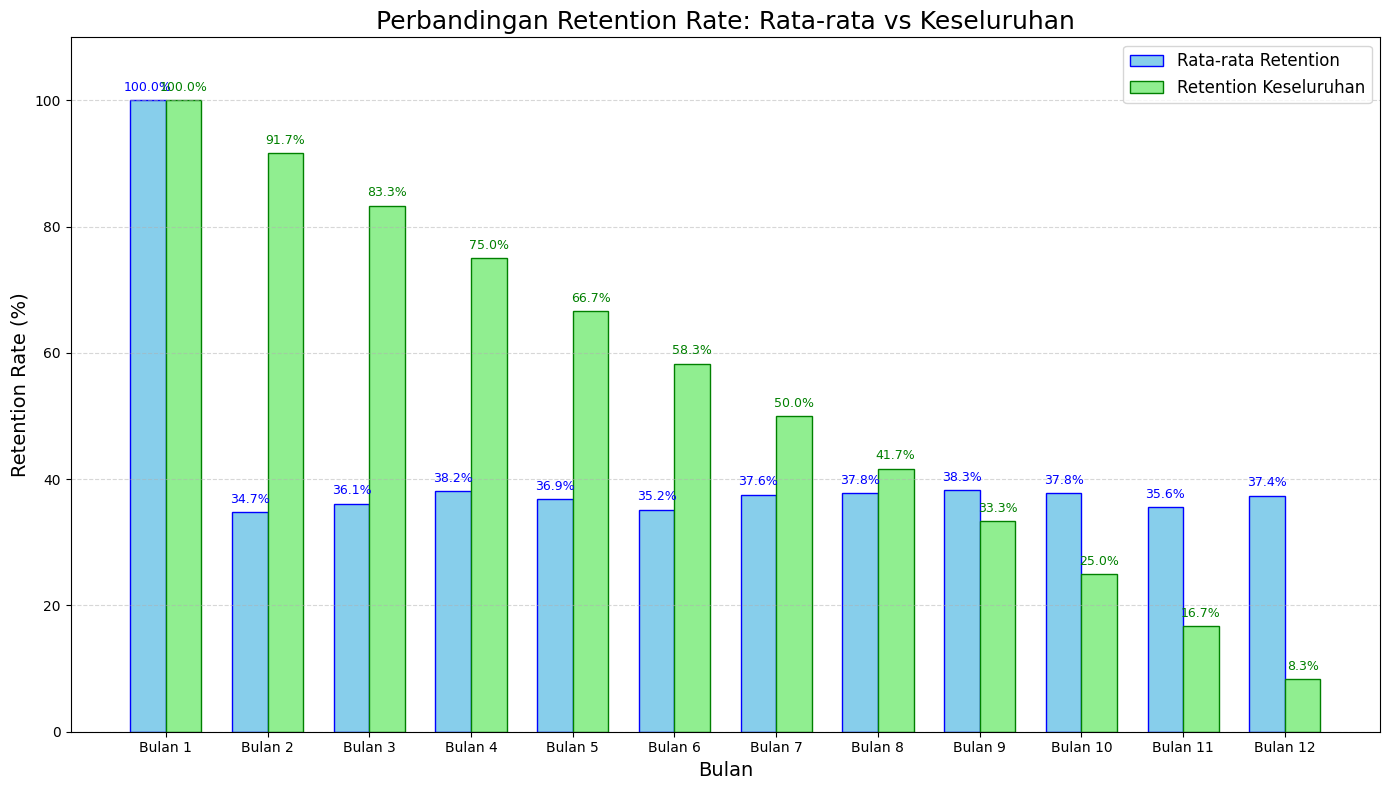

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Asumsikan cohort_pivot_per sudah tersedia

# Buat salinan data untuk manipulasi
cohort_data = cohort_pivot_per.copy()

# Hitung rata-rata retensi untuk setiap bulan
average_retention = cohort_data.mean(axis=0)

# Cetak rata-rata retensi
print("Rata-rata Retention Rate per Bulan:")
print(average_retention.round(2))

# Hitung rata-rata keseluruhan retention rate
overall_average_retention = cohort_data.values.mean()

# Cetak hasil rata-rata keseluruhan
print(f"\nRata-rata Retention Rate keseluruhan: {overall_average_retention:.2f}%")

# Buat daftar label bulan 1-12 untuk digunakan pada visualisasi
month_labels = [f'Bulan {i+1}' for i in range(len(cohort_data.columns))]

# Buat grafik garis untuk rata-rata retensi
plt.figure(figsize=(12, 7))

# Gunakan index yang disesuaikan dimulai dari 1 untuk sumbu x
months = range(1, len(average_retention) + 1)
plt.plot(months, average_retention.values, marker='o', linestyle='-', color='b', linewidth=2, label='Rata-rata Retention Rate')

# Tambahkan judul dan label
plt.title('Rata-rata Retention Rate per Bulan', fontsize=18)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Retention Rate (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Tampilkan label di setiap titik
for i, rate in enumerate(average_retention.values):
    plt.text(months[i], rate + 2, f'{rate:.2f}%', ha='center', va='bottom', fontsize=10)

# Atur sumbu x agar hanya menampilkan angka bulat
plt.xticks(months, month_labels)

# Atur batasan sumbu y untuk memperbaiki visualisasi
plt.ylim(0, 110)

# Tampilkan legenda
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Visualisasi heatmap cohort dengan label bulan 1-12
plt.figure(figsize=(14, 9))
ax = sns.heatmap(cohort_data, annot=True, cmap="Blues", fmt=".1f", linewidths=.5)
plt.title('Cohort Analysis - Retention Rates (%)', fontsize=18)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Tanggal Akuisisi', fontsize=14)

# Setel label x ke Bulan 1-12
ax.set_xticklabels(month_labels)

plt.tight_layout()
plt.show()

# Visualisasi rata-rata retensi dengan bar chart
plt.figure(figsize=(12, 7))
plt.bar(months, average_retention.values, color='skyblue', edgecolor='navy', width=0.6)
plt.title('Rata-rata Retention Rate per Bulan', fontsize=18)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Retention Rate (%)', fontsize=14)
plt.xticks(months, month_labels)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan nilai di atas setiap bar
for i, rate in enumerate(average_retention.values):
    plt.text(months[i], rate + 1, f'{rate:.2f}%', ha='center', fontsize=11, color='navy')

plt.ylim(0, 110)
plt.tight_layout()
plt.show()

# Hitung data kumulatif retensi - persentase retensi keseluruhan per bulan
# Ini menghitung berapa persentase pengguna yang masih aktif di bulan tertentu dibandingkan bulan pertama
cohort_counts = (~pd.isna(cohort_data)).sum()
cumulative_retention = (cohort_counts / cohort_counts.iloc[0] * 100).round(2)

# Cetak data kumulatif retensi
print("\nPersentase Retention Keseluruhan per Bulan:")
for i, retention in enumerate(cumulative_retention):
    print(f"Bulan {i+1}: {retention}%")

# Visualisasi retensi kumulatif dengan line chart
plt.figure(figsize=(12, 7))
plt.plot(months, cumulative_retention.values, marker='s', linestyle='-', color='green', linewidth=2, label='Persentase Retention Keseluruhan')

# Tambahkan judul dan label
plt.title('Persentase Retention Keseluruhan per Bulan', fontsize=18)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Persentase Pengguna yang Bertahan (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Tampilkan label di setiap titik
for i, rate in enumerate(cumulative_retention.values):
    plt.text(months[i], rate + 2, f'{rate:.2f}%', ha='center', va='bottom', fontsize=10)

# Atur sumbu x agar hanya menampilkan angka bulat
plt.xticks(months, month_labels)

# Atur batasan sumbu y
plt.ylim(0, 110)

# Tampilkan legenda
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Membuat tabel perbandingan retensi rata-rata vs retensi keseluruhan
comparison_data = pd.DataFrame({
    'Bulan': [f'Bulan {i+1}' for i in range(len(average_retention))],
    'Rata-rata Retention (%)': average_retention.values.round(2),
    'Retention Keseluruhan (%)': cumulative_retention.values
})

print("\nPerbandingan Retention Rate Rata-rata vs Keseluruhan:")
print(comparison_data)

# Visualisasi perbandingan dengan bar chart
plt.figure(figsize=(14, 8))
x = np.arange(len(month_labels))
width = 0.35

plt.bar(x - width/2, average_retention.values, width, label='Rata-rata Retention', color='skyblue', edgecolor='blue')
plt.bar(x + width/2, cumulative_retention.values, width, label='Retention Keseluruhan', color='lightgreen', edgecolor='green')

plt.title('Perbandingan Retention Rate: Rata-rata vs Keseluruhan', fontsize=18)
plt.xlabel('Bulan', fontsize=14)
plt.ylabel('Retention Rate (%)', fontsize=14)
plt.xticks(x, month_labels)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for i, (avg, cum) in enumerate(zip(average_retention.values, cumulative_retention.values)):
    plt.text(i - width/2, avg + 1, f'{avg:.1f}%', ha='center', va='bottom', fontsize=9, color='blue')
    plt.text(i + width/2, cum + 1, f'{cum:.1f}%', ha='center', va='bottom', fontsize=9, color='green')

plt.ylim(0, 110)
plt.tight_layout()
plt.show()

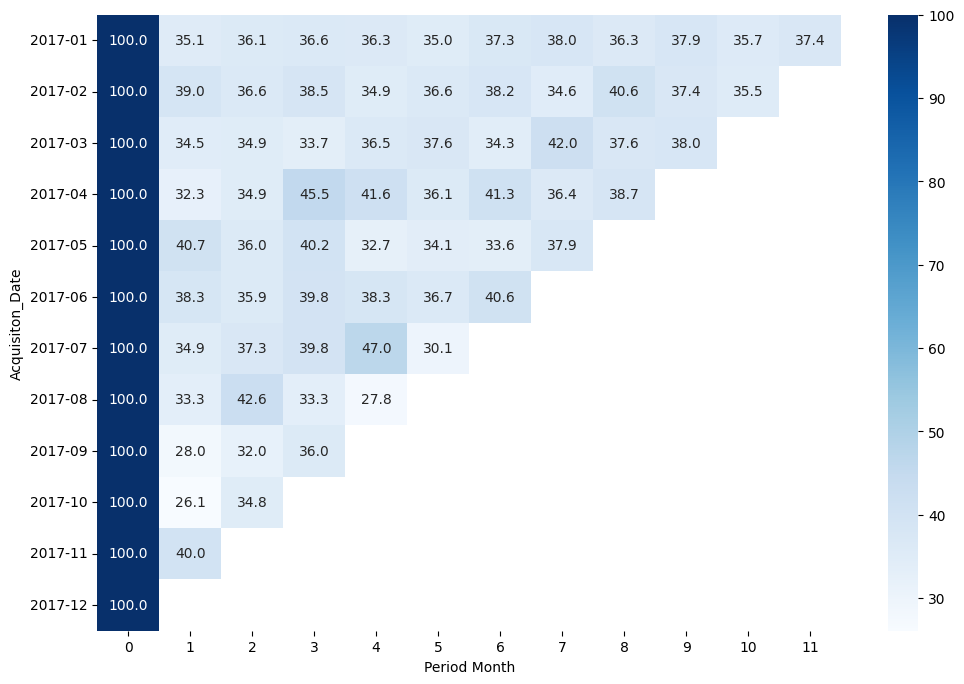

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))

sns.heatmap(cohort_pivot_per, annot=True, cmap='Blues', fmt = '.1f')
plt.savefig('cohort.png')
plt.show()

Penjelasan Elemen Visualisasi:
- Sumbu Vertikal (Acquisition_Date) → Menunjukkan bulan saat pengguna pertama kali bergabung atau mulai menggunakan layanan.
- Sumbu Horizontal (bulan-bulan berikutnya) → Menunjukkan periode transaksi setelah bulan akuisisi.
- Nilai dalam Sel (%) → Menunjukkan persentase pengguna yang masih aktif pada bulan tertentu setelah bulan akuisisi mereka.
- Warna → Warna lebih gelap menunjukkan retensi yang lebih tinggi, sedangkan warna lebih terang menunjukkan retensi yang lebih rendah.

In [ ]:
# Menghitung tanggal terakhir transaksi setiap pelanggan
last_transaction = df.groupby('CustomerID')['transaction_date'].max().reset_index()
last_transaction.columns = ['CustomerID', 'last_transaction_date']

In [ ]:
# Pastikan kolom 'transaction_date' sudah dalam format datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

# Jika ada kolom lain yang berisi tanggal, pastikan juga diubah ke datetime
# Contoh: df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
from datetime import timedelta

# Tentukan tanggal analisis (misalnya, tanggal terakhir dalam dataset)
analysis_date = df['transaction_date'].max()

# Tentukan periode churn (misalnya, 30 hari)
churn_period = timedelta(days=30)

# Menambahkan kolom churn
last_transaction['is_churned'] = (analysis_date - last_transaction['last_transaction_date']) > churn_period

In [ ]:
# Gabungkan data churn dengan data transaksi
df = pd.merge(df, last_transaction, on='CustomerID', how='left')

In [ ]:
# Analisis churn
total_churned = last_transaction['is_churned'].sum()
churn_rate = last_transaction['is_churned'].mean() * 100

print(f"Total pelanggan yang churn: {total_churned}")
print(f"Persentase churn: {churn_rate:.2f}%")

Total pelanggan yang churn: 2173
Persentase churn: 62.23%


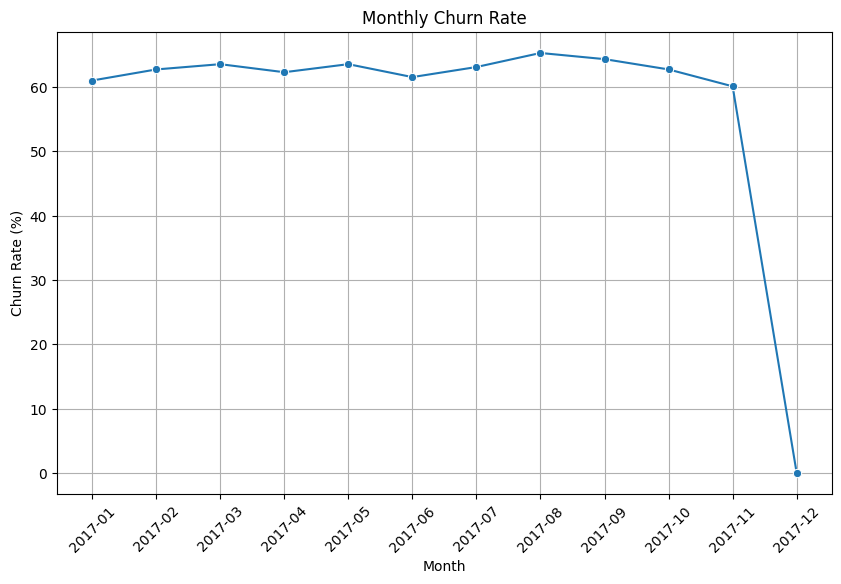

In [ ]:
# Tambahkan kolom bulan
df['month'] = df['transaction_date'].dt.to_period('M')

# Hitung churn rate per bulan
monthly_churn = df.groupby('month')['is_churned'].mean() * 100

# Buat grafik garis
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_churn.index.astype(str), y=monthly_churn.values, marker='o')
plt.title('Monthly Churn Rate')
plt.xlabel('Month')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('churn.png')
plt.show()

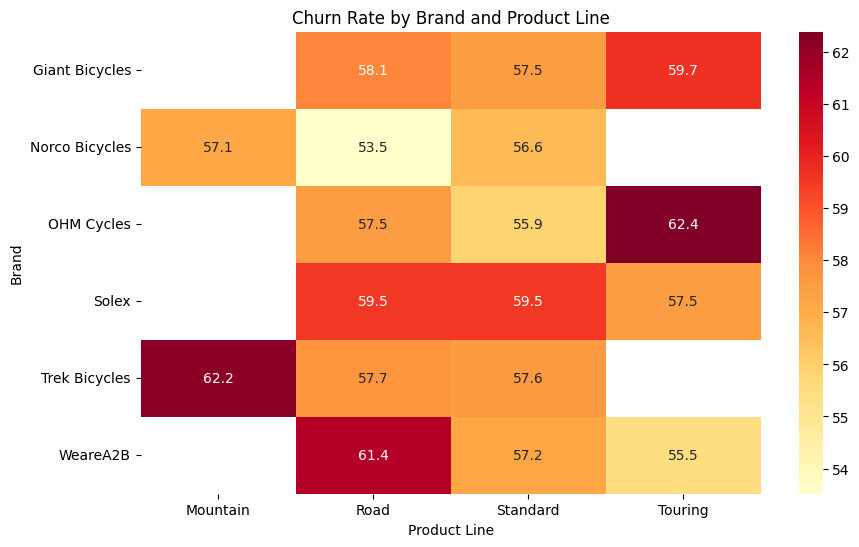

In [ ]:
# Hitung churn rate berdasarkan brand dan product line
churn_by_brand_product = df.groupby(['brand', 'product_line'])['is_churned'].mean() * 100
churn_by_brand_product = churn_by_brand_product.unstack()

# Buat heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(churn_by_brand_product, annot=True, fmt=".1f", cmap='YlOrRd')
plt.title('Churn Rate by Brand and Product Line')
plt.xlabel('Product Line')
plt.ylabel('Brand')
plt.show()

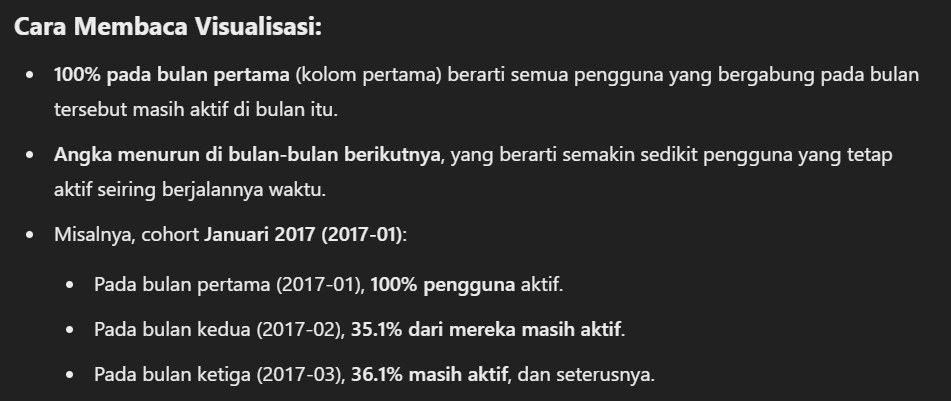

# RFM

## Data Preprocessing

In [ ]:
import pandas as pd
df = pd.read_csv('transaction_data.csv')
df

,Unnamed: 0,transaction_id,product_id,CustomerID,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,InvoiceDate
0,0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-25
1,1,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-21
2,2,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-16
3,3,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-31
4,4,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,2017-06-24
19996,19996,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,2017-11-09
19997,19997,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,2017-04-14
19998,19998,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,2017-07-03


# Missing Values

In [ ]:
# Untuk mengecek missing value

df.isna().sum()

,0
Unnamed: 0,0
transaction_id,0
product_id,0
CustomerID,0
transaction_date,0
online_order,360
order_status,0
brand,197
product_line,197
product_class,197


In [ ]:
#menghitung persentase missing values
df.isna().sum() / len(df) * 100

,0
Unnamed: 0,0.000
transaction_id,0.000
product_id,0.000
CustomerID,0.000
transaction_date,0.000
online_order,1.800
order_status,0.000
brand,0.985
product_line,0.985
product_class,0.985


KARENA MISSING VALUESNYA KURANG DARI 2% SEHINGGA LANGSUNG DROP SAJA

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,transaction_id,product_id,CustomerID,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,InvoiceDate
0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-25
1,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-21
2,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-16
3,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-31
4,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19440,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,2017-06-24
19441,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,2017-11-09
19442,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,2017-04-14
19443,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,2017-07-03


In [ ]:

# Simpan sebagai CSV
df.to_csv('data_transaction_cleaning.csv', index=False)

# Download file ke lokal
from google.colab import files
files.download('data_transaction_cleaning.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Data Duplikat

In [ ]:
#menghitung jumlah yang sama
df.duplicated().sum()

0

1. transaction_id (ID Transaksi)
  - ID transaksi berkisar dari 1 hingga 20.000, menunjukkan bahwa terdapat 19.445 transaksi unik di dataset.
  - Nilai mean sekitar 9.989, yang menunjukkan bahwa transaksi tersebar cukup merata di antara rentang ID.
2. product_id (ID Produk)
  - ID produk berkisar dari 0 hingga 100, dengan nilai rata-rata sekitar 45.8.
  - Standar deviasi sekitar 30.57, menunjukkan ada variasi yang cukup besar dalam ID produk.
3. CustomerID (ID Pelanggan)
  - Terdapat 19.445 pelanggan unik, dengan ID berkisar dari 1 hingga 5034.
  - Nilai rata-rata 1739.46, menunjukkan distribusi pelanggan cukup luas.
4. list_price (Harga Produk)
  - Harga produk berkisar antara 12.01 hingga 2091.47.
  - Harga rata-rata sekitar 1107.34, dengan standar deviasi 582.66, menunjukkan variasi harga yang cukup besar.
5. standard_cost (Biaya Standar)
  - Biaya produksi berkisar antara 7.21 hingga 1759.85.
  - Rata-rata biaya produksi adalah 555.59, dengan standar deviasi 405.59, menunjukkan bahwa ada produk yang jauh lebih mahal untuk diproduksi dibandingkan yang lain.
6. product_first_sold_date (Tanggal Produk Pertama Dijual)
  - Nilai berkisar antara 33.259 hingga 42.710, yang tampaknya merupakan representasi tanggal dalam format numerik (mungkin format Julian atau Unix Timestamp).
  - Rata-rata sekitar 38.201, yang bisa dikonversi ke format tanggal untuk interpretasi yang lebih jelas.


In [ ]:
import pandas as pd

# Misalkan data Anda sudah dimuat ke dalam DataFrame df
Q1 = df['standard_cost'].quantile(0.25)
Q3 = df['standard_cost'].quantile(0.75)
IQR = Q3 - Q1

batas_atas = Q3 + 1.5 * IQR

# Pisahkan data
data_tinggi = df[df['standard_cost'] > batas_atas]  # Outliers
data_rendah = df[df['standard_cost'] <= batas_atas]  # Non-outliers
data_tinggi

,transaction_id,product_id,CustomerID,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,InvoiceDate,Acquisiton_Date,Transaction Month
59,60,60,3473,2017-12-18 00:00:00,False,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,41848.0,2017-12-18,2017-05,2017-12
140,143,60,2135,2017-01-26 00:00:00,True,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,41047.0,2017-01-26,2017-01,2017-01
285,292,64,3380,2017-10-28 00:00:00,False,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,42172.0,2017-10-28,2017-06,2017-10
400,413,60,720,2017-09-09 00:00:00,False,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,41848.0,2017-09-09,2017-01,2017-09
681,699,60,1535,2017-08-13 00:00:00,False,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,40779.0,2017-08-13,2017-05,2017-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18654,19191,60,3411,2017-06-23 00:00:00,False,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,40410.0,2017-06-23,2017-01,2017-06
19003,19552,64,844,2017-08-09 00:00:00,False,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,40779.0,2017-08-09,2017-01,2017-08
19154,19706,60,54,2017-10-24 00:00:00,False,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,42172.0,2017-10-24,2017-02,2017-10
19171,19723,60,1841,2017-01-03 00:00:00,True,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,40779.0,2017-01-03,2017-01,2017-01


In [ ]:
#cek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19445 entries, 0 to 19444
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           19445 non-null  int64  
 1   product_id               19445 non-null  int64  
 2   CustomerID               19445 non-null  int64  
 3   transaction_date         19445 non-null  object 
 4   online_order             19445 non-null  object 
 5   order_status             19445 non-null  object 
 6   brand                    19445 non-null  object 
 7   product_line             19445 non-null  object 
 8   product_class            19445 non-null  object 
 9   product_size             19445 non-null  object 
 10  list_price               19445 non-null  float64
 11  standard_cost            19445 non-null  float64
 12  product_first_sold_date  19445 non-null  float64
 13  InvoiceDate              19445 non-null  object 
dtypes: float64(3), int64(3

In [ ]:
#ubah invocedate ke datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19445 entries, 0 to 19444
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   CustomerID               19445 non-null  int64         
 3   transaction_date         19445 non-null  object        
 4   online_order             19445 non-null  object        
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [ ]:
#ubah invocedate ke datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19445 entries, 0 to 19444
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   CustomerID               19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  object        
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [ ]:
df['InvoiceDate'].dt.month

,InvoiceDate
0,2
1,5
2,10
3,8
4,10
...,...
19440,6
19441,11
19442,4
19443,7


In [ ]:
# cek data yang statusnya cancel
df[df['order_status'] == 'Cancelled']

,transaction_id,product_id,CustomerID,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,InvoiceDate
42,43,76,488,2017-03-17,False,Cancelled,WeareA2B,Standard,low,medium,642.31,513.85,41922.0,2017-03-17
136,139,32,2073,2017-03-25,False,Cancelled,Giant Bicycles,Standard,high,medium,1179.00,707.40,36833.0,2017-03-25
244,250,48,1454,2017-11-25,False,Cancelled,WeareA2B,Standard,medium,medium,1762.96,950.52,35470.0,2017-11-25
248,255,67,2801,2017-04-01,True,Cancelled,Norco Bicycles,Road,medium,medium,544.05,376.84,38647.0,2017-04-01
567,584,43,1019,2017-09-13,True,Cancelled,Solex,Standard,medium,medium,1151.96,649.49,34071.0,2017-09-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18860,19406,79,1860,2017-05-29,False,Cancelled,Norco Bicycles,Standard,medium,medium,1555.58,818.01,42218.0,2017-05-29
18864,19410,79,1771,2017-01-15,False,Cancelled,Norco Bicycles,Standard,medium,medium,1555.58,818.01,42226.0,2017-01-15
19270,19823,3,2312,2017-12-02,False,Cancelled,Trek Bicycles,Standard,medium,large,2091.47,388.92,36361.0,2017-12-02
19402,19958,56,2013,2017-06-04,True,Cancelled,OHM Cycles,Standard,medium,medium,183.86,137.90,34170.0,2017-06-04


In [ ]:
#mengambil data kecuali cancel pada order_status
df = df[df['order_status'] != 'Cancelled']
df

,transaction_id,product_id,CustomerID,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,InvoiceDate
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-25
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-21
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-16
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-31
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19440,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,2017-06-24
19441,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,2017-11-09
19442,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,2017-04-14
19443,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,2017-07-03


# Recency

In [ ]:
# Menentukan tanggal terakhir dalam dataset
current_date = df['transaction_date'].max()
current_date

Timestamp('2017-12-30 00:00:00')

In [ ]:
#mencari tanggal terakhir (last transaction) untuk setiap customer

last_transaction = df.groupby('CustomerID')['InvoiceDate'].max()
last_transaction

,InvoiceDate
CustomerID,
1,2017-12-23
2,2017-08-24
3,2017-09-19
4,2017-06-18
5,2017-12-14
...,...
3497,2017-11-08
3498,2017-08-25
3499,2017-11-09


In [ ]:
# mencari selisih antara tanggal terkini (current date) dengan tanggal terakhir customer belanja

recency = current_date - last_transaction
recency

,InvoiceDate
CustomerID,
1,7 days
2,128 days
3,102 days
4,195 days
5,16 days
...,...
3497,52 days
3498,127 days
3499,51 days


In [ ]:
#karenan hanya membutuhkan harinya saja makanya make dt.days
recency = (current_date - last_transaction).dt.days
recency = recency.rename('Recency')
recency

,Recency
CustomerID,
1,7
2,128
3,102
4,195
5,16
...,...
3497,52
3498,127
3499,51


# Frequency

In [ ]:
frequency = df.groupby('CustomerID')['transaction_id'].count().rename('Frequency')
frequency

,Frequency
CustomerID,
1,11
2,3
3,7
4,2
5,6
...,...
3497,3
3498,6
3499,7


In [ ]:
monetary = df.groupby('CustomerID')['list_price'].sum().rename('Monetary')
monetary

,Monetary
CustomerID,
1,9084.45
2,4149.07
3,9525.22
4,1047.72
5,5903.20
...,...
3497,3744.07
3498,5177.06
3499,7673.48


#RFM

In [ ]:
rfm = pd.DataFrame({
    'Recency':recency,
    'Frequency':frequency,
    'Monetary':monetary
}).reset_index()
rfm

,CustomerID,Recency,Frequency,Monetary
0,1,7,11,9084.45
1,2,128,3,4149.07
2,3,102,7,9525.22
3,4,195,2,1047.72
4,5,16,6,5903.20
...,...,...,...,...
3485,3497,52,3,3744.07
3486,3498,127,6,5177.06
3487,3499,51,7,7673.48
3488,3500,144,6,4922.41


In [ ]:
import pandas as pd
#menyimpan ke csv
rfm.to_csv('rfm.csv', index=False)

In [ ]:
round(rfm.describe(),2)

,CustomerID,Recency,Frequency,Monetary
count,3490.00,3490.00,3490.00,3490.00
mean,1750.09,62.85,5.52,6113.58
std,1011.35,59.37,2.28,2898.02
min,1.00,0.00,1.00,60.34
25%,876.25,18.00,4.00,4023.00
50%,1749.50,45.00,5.00,5829.05
75%,2622.75,88.00,7.00,7934.46
max,5034.00,353.00,14.00,19071.32


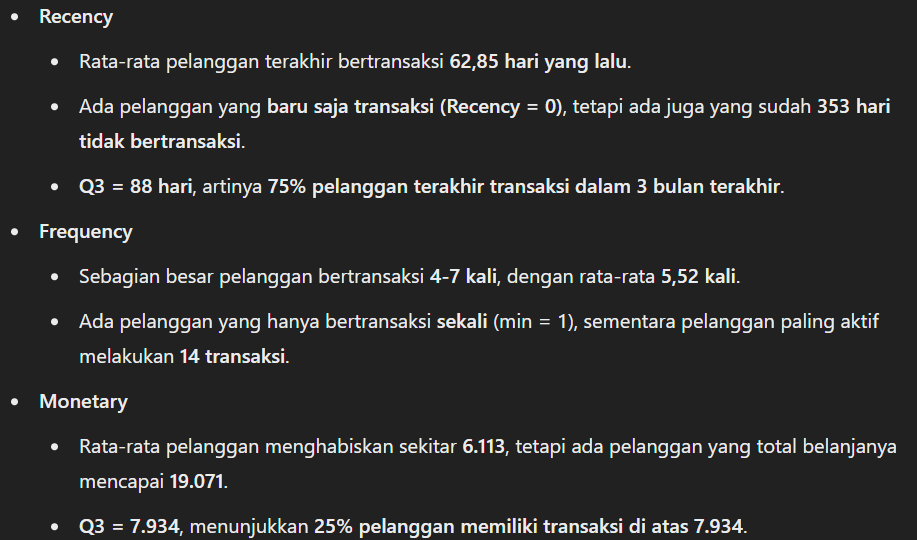

In [ ]:
rfm.sort_values('Frequency', ascending = False).head(20)

,CustomerID,Recency,Frequency,Monetary
2470,2476,14,14,14578.69
2177,2183,8,14,19071.32
1064,1068,4,14,14254.55
1941,1946,88,13,11237.38
635,637,7,13,13899.73
1908,1913,42,13,8621.87
2067,2072,8,13,11845.44
2904,2912,46,13,14149.73
1125,1129,26,13,18349.27
2458,2464,2,13,14574.06


# Histogram dan Boxplot (RFM)

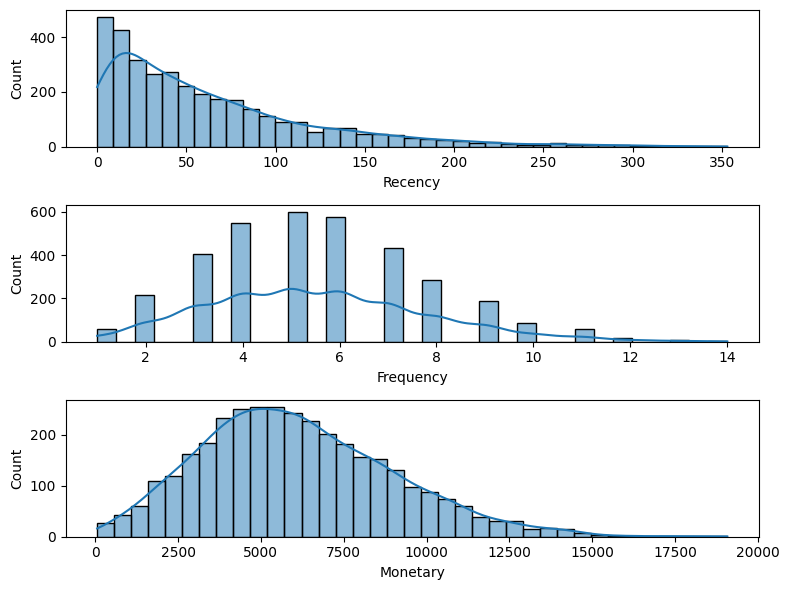

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

plt.subplot(3,1,1)
sns.histplot(rfm['Recency'], kde=True)

plt.subplot(3,1,2)
sns.histplot(rfm['Frequency'], kde=True)

plt.subplot(3,1,3)
sns.histplot(rfm['Monetary'], kde=True)


plt.tight_layout()
plt.savefig('rfm.png')
plt.show()


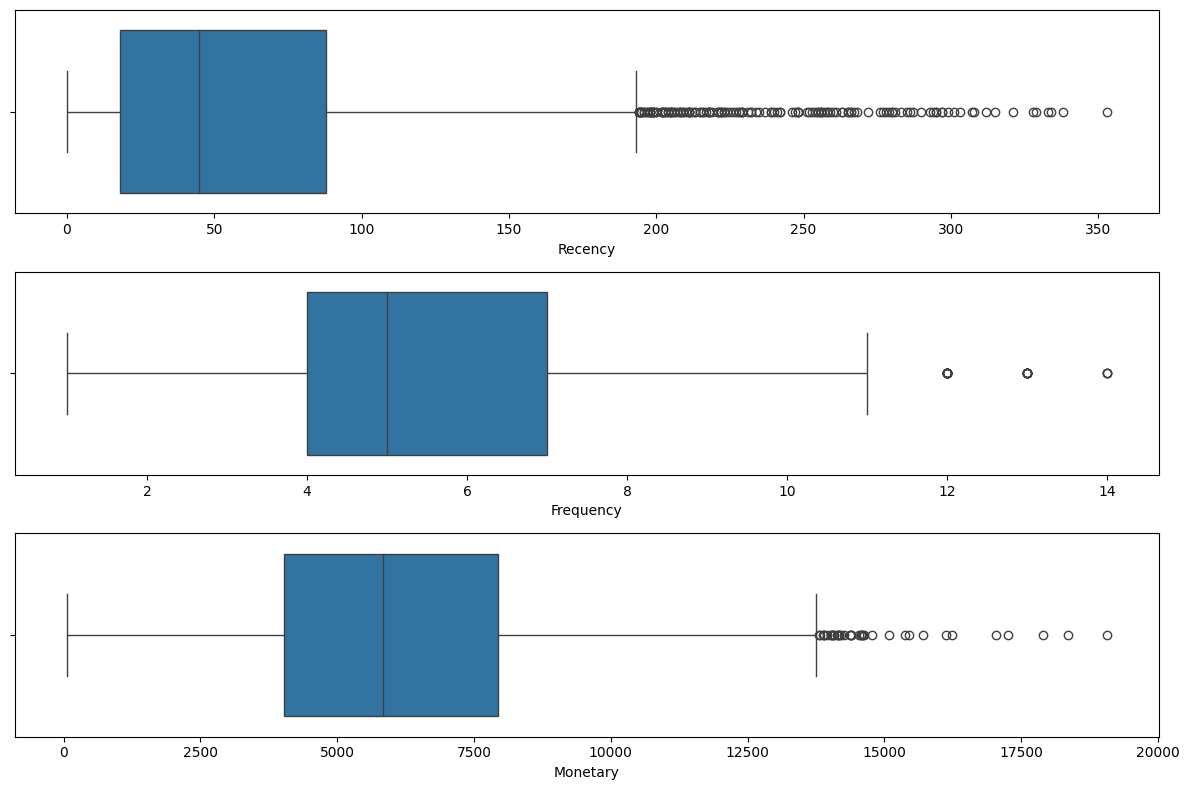

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))

plt.subplot(3,1,1)
sns.boxplot(x = rfm['Recency'])

plt.subplot(3,1,2)
sns.boxplot(x = rfm['Frequency'])

plt.subplot(3,1,3)
sns.boxplot(x = rfm['Monetary'])


plt.tight_layout()
plt.show()


- Recency
  - Customer kita kebanyakan membeli 20-80 hari yang lalu (cukup baru)
- Frequency
  - customer kita kebanyakan baru 4 sampai 7 kali membeli ulang / re purcase
- Monetary
  - customer kita kebanyakan 4000 dollar sampai 7900 dollar

In [ ]:
# mendefinisikan score dari statistika deskriftifnya
rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,3490.000000,3490.000000,3490.000000,3490.000000
mean,1750.092837,62.847564,5.522350,6113.584424
std,1011.348380,59.365082,2.275693,2898.017543
min,1.000000,0.000000,1.000000,60.340000
25%,876.250000,18.000000,4.000000,4023.002500
50%,1749.500000,45.000000,5.000000,5829.050000
75%,2622.750000,88.000000,7.000000,7934.462500
max,5034.000000,353.000000,14.000000,19071.320000


# RFM SCORE

In [ ]:
def rfm_score(baris):
  #recency
  if baris['Recency'] <= 18: # dari nilai kuartil 1 / 25%
    r = 4
  elif baris['Recency'] <= 45: # kuartil 2 / 50%
    r = 3
  elif baris['Recency'] <= 88: # kuartil 3 / 75%
    r = 2
  else:
    r = 1

  #frequncy
  if baris['Frequency'] <= 3: #Q1
    f = 1
  elif baris['Frequency'] <= 5: #Q2
    f = 2
  elif baris['Frequency'] <= 10: #Q3
    f = 3
  else:
    f = 4

  #monetary
  if baris['Monetary'] <= 4000: #Q1 / kuartil 1
    m = 1
  elif baris['Monetary'] <= 5800: #Q2
    m = 2
  elif baris['Monetary'] <= 7900: #Q3
    m = 3
  else:
    m = 4


  return pd.Series({'R_Score': r, 'F_Score': f, 'M_Score': m})

rfm[['R_Score', 'F_Score', 'M_Score']] = rfm.apply(rfm_score, axis=1)
rfm['RFM_Score'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']
rfm


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,1,7,11,9084.45,4,4,4,12
1,2,128,3,4149.07,1,1,2,4
2,3,102,7,9525.22,1,3,4,8
3,4,195,2,1047.72,1,1,1,3
4,5,16,6,5903.20,4,3,3,10
...,...,...,...,...,...,...,...,...
3485,3497,52,3,3744.07,2,1,1,4
3486,3498,127,6,5177.06,1,3,2,6
3487,3499,51,7,7673.48,2,3,3,8
3488,3500,144,6,4922.41,1,3,2,6


In [ ]:
rfm['Rank'] = rfm['Monetary'].rank(method='dense', ascending=False)

# Menampilkan hasil dengan sorting berdasarkan ranking
rfm = rfm.sort_values('Rank')

rfm

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Rank
2177,2183,8,14,19071.32,4,4,4,12,1.0
1125,1129,26,13,18349.27,3,4,4,11,2.0
937,941,33,10,17898.46,3,3,4,10,3.0
2781,2788,44,11,17258.94,3,4,4,11,4.0
1298,1302,29,13,17035.83,3,4,4,11,5.0
...,...,...,...,...,...,...,...,...,...
2417,2423,59,1,202.62,2,1,1,4,3459.0
3180,3189,56,2,200.70,2,1,1,4,3460.0
2268,2274,55,2,142.98,2,1,1,4,3461.0
2526,2532,140,1,71.49,1,1,1,3,3462.0


# RFM Segmentation

In [ ]:
#  SEPERTI KATEGORI PADA SHOPEE YAITU PLATINUM, GOLD

rfm['FM_Score'] = rfm['F_Score'] + rfm['M_Score']

# Manual Clustering using IF-ELSE Conditions
def segment_customer(row):
    recency = row['R_Score']
    fm_combined = row['FM_Score']
    if recency >= 4 and fm_combined >= 4:
        return 'Champions'
    elif recency >= 3 and fm_combined >= 3:
        return 'Loyal Customers'
    elif recency >= 2 and fm_combined >= 3:
        return 'Potential Loyalist'
    elif recency >= 3 and fm_combined <= 2:
        return 'Promising'
    elif recency < 2 and fm_combined >= 3:
        return 'At Risk'
    elif recency < 2 and fm_combined <= 2:
        return 'Lost'
    else:
        return 'Uncategorized'

# Apply the segmentation function
rfm['Customer_Segment'] = rfm.apply(segment_customer, axis=1)
rfm


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Rank,FM_Score,Customer_Segment
2177,2183,8,14,19071.32,4,4,4,12,1.0,8,Champions
1125,1129,26,13,18349.27,3,4,4,11,2.0,8,Loyal Customers
937,941,33,10,17898.46,3,3,4,10,3.0,7,Loyal Customers
2781,2788,44,11,17258.94,3,4,4,11,4.0,8,Loyal Customers
1298,1302,29,13,17035.83,3,4,4,11,5.0,8,Loyal Customers
...,...,...,...,...,...,...,...,...,...,...,...
2417,2423,59,1,202.62,2,1,1,4,3459.0,2,Uncategorized
3180,3189,56,2,200.70,2,1,1,4,3460.0,2,Uncategorized
2268,2274,55,2,142.98,2,1,1,4,3461.0,2,Uncategorized
2526,2532,140,1,71.49,1,1,1,3,3462.0,2,Lost


In [ ]:
import pandas as pd

# Menghitung jumlah transaksi per segmen
jumlah_transaksi = rfm.groupby('Customer_Segment').size()

# Menghitung jumlah pelanggan unik per segmen
jumlah_pelanggan = rfm.groupby('Customer_Segment')['CustomerID'].nunique()

# Menghitung total nilai transaksi per segmen
nilai_transaksi = rfm.groupby('Customer_Segment')['list_price'].sum()

# Menggabungkan hasil menjadi satu DataFrame
hasil_segmentasi = pd.DataFrame({
    'Jumlah Transaksi': jumlah_transaksi,
    'Jumlah Pelanggan': jumlah_pelanggan,
    'Total Nilai Transaksi': nilai_transaksi
})

# Menampilkan hasil
print(hasil_segmentasi)

                    Jumlah Transaksi  Jumlah Pelanggan  Total Nilai Transaksi
Customer_Segment                                                             
At Risk                         3051               588             3524750.69
Champions                       5127               756             5767920.27
Lost                             629               281              623252.91
Loyal Customers                 5246               842             5748270.81
Potential Loyalist              4484               737             4931656.48
Promising                        405               158              414793.97
Uncategorized                    331               128              325764.51


In [ ]:
import pandas as pd

# Hitung jumlah pelanggan unik per brand
jumlah_pelanggan = df.groupby('brand')['CustomerID'].nunique().reset_index()
jumlah_pelanggan.columns = ['brand', 'jumlah_pelanggan']

# Hitung total uang yang dikeluarkan per brand
total_uang = df.groupby('brand')['list_price'].sum().reset_index()
total_uang.columns = ['brand', 'total_uang_dikeluarkan']

# Gabungkan hasil perhitungan ke dalam satu dataframe
brand_summary = jumlah_pelanggan.merge(total_uang, on='brand')

# Tampilkan hasil
brand_summary = brand_summary.sort_values(by='total_uang_dikeluarkan', ascending=False)
print(brand_summary)

            brand  jumlah_pelanggan  total_uang_dikeluarkan
3           Solex              2438              4349881.08
5        WeareA2B              2123              4065955.16
0  Giant Bicycles              2143              3973717.00
4   Trek Bicycles              1997              3447480.46
2      OHM Cycles              1984              2907794.33
1  Norco Bicycles              1912              2591581.61


In [ ]:
jumlah_pelanggan = df.groupby('brand')['CustomerID'].nunique().reset_index()
jumlah_pelanggan.columns = ['brand', 'jumlah_pelanggan']
print(jumlah_pelanggan)

            brand  jumlah_pelanggan
0  Giant Bicycles              2143
1  Norco Bicycles              1912
2      OHM Cycles              1984
3           Solex              2438
4   Trek Bicycles              1997
5        WeareA2B              2123


<ipython-input-132-128b49842575>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='brand', y='jumlah_pelanggan', data=jumlah_pelanggan, palette='viridis')
<ipython-input-132-128b49842575>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='brand', y='total_uang_dikeluarkan', data=total_uang, palette='magma')


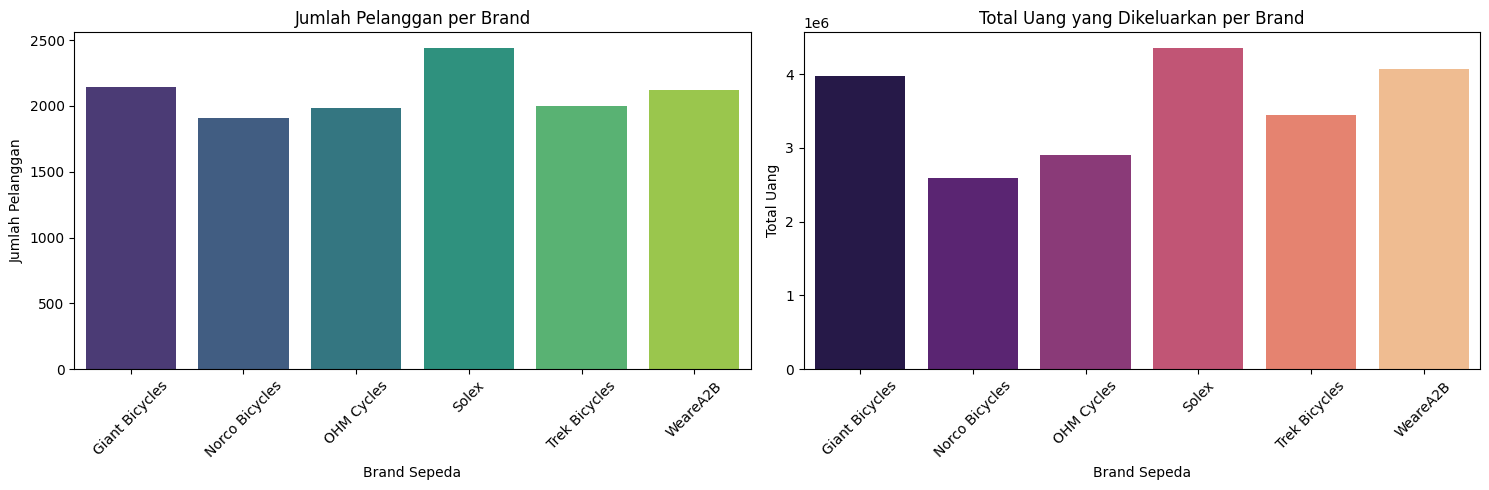

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Bar chart jumlah pelanggan
sns.barplot(ax=axes[0], x='brand', y='jumlah_pelanggan', data=jumlah_pelanggan, palette='viridis')
axes[0].set_title('Jumlah Pelanggan per Brand')
axes[0].set_xlabel('Brand Sepeda')
axes[0].set_ylabel('Jumlah Pelanggan')
axes[0].tick_params(axis='x', rotation=45)

# Bar chart total uang yang dikeluarkan
sns.barplot(ax=axes[1], x='brand', y='total_uang_dikeluarkan', data=total_uang, palette='magma')
axes[1].set_title('Total Uang yang Dikeluarkan per Brand')
axes[1].set_xlabel('Brand Sepeda')
axes[1].set_ylabel('Total Uang')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
rfm['Customer_Segment'].value_counts()

,count
Customer_Segment,
Loyal Customers,842
Champions,756
Potential Loyalist,737
At Risk,588
Lost,281
Promising,158
Uncategorized,128


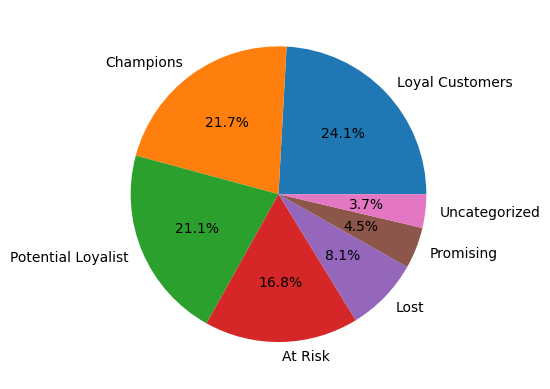

In [ ]:
plt.pie(rfm['Customer_Segment'].value_counts(), labels=rfm['Customer_Segment'].value_counts().index, autopct='%1.1f%%')
plt.show()

In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyo

# Buat pemetaan warna untuk setiap segmen customer
color_map = {
    'Champions': 'blue',
    'Loyal Customers': 'green',
    'Potential Loyalist': 'orange',
    'Promising': 'purple',
    'At Risk': 'red',
    'Lost': 'gray',
    'Uncategorized': 'black'
}

# List untuk menyimpan traces
traces = []

# Loop melalui setiap segmen dan buat scatter plot terpisah untuk tiap segmen
for segment, color in color_map.items():
    df_segment = rfm[rfm['Customer_Segment'] == segment]  # Filter data untuk segmen ini

    trace = go.Scatter3d(
        x=df_segment['Recency'],
        y=df_segment['Frequency'],
        z=df_segment['Monetary'],
        mode='markers',
        marker=dict(color=color, size=5, opacity=0.8),
        name=segment  # Menambahkan nama untuk legend
    )

    traces.append(trace)  # Tambahkan trace ke daftar

# Buat layout
layout = go.Layout(
    title='Cluster with Legend',
    scene=dict(
        xaxis=dict(title='Recency'),
        yaxis=dict(title='Frequency'),
        zaxis=dict(title='Monetary')
    ),
    showlegend=True  # Pastikan legend ditampilkan
)

# Buat dan tampilkan figure
fig = go.Figure(data=traces, layout=layout)
pyo.iplot(fig)

# Market Basket Analysis (Apriori Association Rule)

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules


In [ ]:
import pandas as pd
df = pd.read_csv('transaction_data.csv').drop(columns=['Unnamed: 0'])
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,transaction_id,product_id,CustomerID,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,InvoiceDate
0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-25
1,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-21
2,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-16
3,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-31
4,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19440,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,2017-06-24
19441,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,2017-11-09
19442,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,2017-04-14
19443,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,2017-07-03


In [ ]:
# ada berapa jumlah nama produk

df['brand'].nunique()

6

In [ ]:
top6 = df.groupby('brand')['transaction_id'].nunique().sort_values(ascending=False).head(6)
top6

,transaction_id
brand,
Solex,4169
WeareA2B,3245
Giant Bicycles,3244
OHM Cycles,2993
Trek Bicycles,2931
Norco Bicycles,2863


In [ ]:
basket = df.pivot_table(
    index = 'CustomerID',
    columns = 'brand',
    aggfunc = 'size', # menghitung count dari description
    fill_value= 0 # yang kosong menjadi 0
)

# mengubah nilai menjadi 1 dan 0 (1 jika pernah membeli dan 0 belum pernah membeli)
basket = basket.map(lambda x: 1 if x > 0 else 0)
basket

brand,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B
CustomerID,,,,,,
1,1,1,1,1,1,0
2,1,0,0,0,0,1
3,1,1,0,0,1,0
4,1,0,0,1,0,0
5,1,1,0,1,1,1
...,...,...,...,...,...,...
3497,1,0,0,1,0,0
3498,0,0,1,1,1,1
3499,1,1,0,1,0,1


In [ ]:
# mendapatkan antecedent support

support_antecedent = apriori(basket,
                            min_support=0.05, # minimal proporsi produk 5%
                            use_colnames=True)
support_antecedent.sort_values('support', ascending=False)

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets
3,0.700458,(Solex)
0,0.617125,(Giant Bicycles)
5,0.612257,(WeareA2B)
4,0.573883,(Trek Bicycles)
2,0.571019,(OHM Cycles)
...,...,...
57,0.079897,"(WeareA2B, Giant Bicycles, Solex, Norco Bicycl..."
60,0.077892,"(WeareA2B, Giant Bicycles, Solex, OHM Cycles, ..."
56,0.076460,"(Giant Bicycles, Solex, Norco Bicycles, OHM Cy..."
61,0.075029,"(WeareA2B, Solex, Norco Bicycles, OHM Cycles, ..."


In [ ]:
association_rules(support_antecedent, metric='confidence', min_threshold=0.2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Giant Bicycles),(Norco Bicycles),0.617125,0.550401,0.338774,0.548956,0.997375,1.0,-0.000892,0.996796,-0.006828,0.408777,-0.003214,0.582230
1,(Norco Bicycles),(Giant Bicycles),0.550401,0.617125,0.338774,0.615505,0.997375,1.0,-0.000892,0.995786,-0.005821,0.408777,-0.004232,0.582230
2,(OHM Cycles),(Giant Bicycles),0.571019,0.617125,0.349370,0.611836,0.991429,1.0,-0.003020,0.986373,-0.019754,0.416524,-0.013815,0.588980
3,(Giant Bicycles),(OHM Cycles),0.617125,0.571019,0.349370,0.566125,0.991429,1.0,-0.003020,0.988720,-0.022081,0.416524,-0.011409,0.588980
4,(Giant Bicycles),(Solex),0.617125,0.700458,0.428408,0.694200,0.991065,1.0,-0.003862,0.979534,-0.023005,0.481804,-0.020894,0.652905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,"(WeareA2B, OHM Cycles)","(Trek Bicycles, Solex, Norco Bicycles)",0.342784,0.215922,0.075029,0.218881,1.013701,1.0,0.001014,1.003787,0.020566,0.155121,0.003773,0.283180
464,"(WeareA2B, Trek Bicycles)","(OHM Cycles, Solex, Norco Bicycles)",0.347652,0.218499,0.075029,0.215815,0.987716,1.0,-0.000933,0.996577,-0.018707,0.152770,-0.003434,0.279598
465,"(OHM Cycles, Norco Bicycles)","(WeareA2B, Trek Bicycles, Solex)",0.315006,0.239691,0.075029,0.238182,0.993705,1.0,-0.000475,0.998019,-0.009164,0.156418,-0.001985,0.275602
466,"(Trek Bicycles, Norco Bicycles)","(WeareA2B, OHM Cycles, Solex)",0.317010,0.238259,0.075029,0.236676,0.993355,1.0,-0.000502,0.997926,-0.009699,0.156231,-0.002078,0.275790


In [ ]:
association_rules(support_antecedent, metric='lift', min_threshold=0.2).head(1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Giant Bicycles),(Norco Bicycles),0.617125,0.550401,0.338774,0.548956,0.997375,1.0,-0.000892,0.996796,-0.006828,0.408777,-0.003214,0.58223


- Antecedent Support

  - proporsi dari pembelian (Giant Bicycles) adalah 61% dari keseluruhan transaksi
- Consequent Support
  - proporsi dari pembelian (Norco Bicycles) adalah 55% dari total keseluruhan transaksi
- Support
  - (Giant Bicycles) dan (Norco Bicycles) diberli bersamaan sebanyak 33% dari keseluruhan transaksi
- Confidence
  - Support / Antecedent Support
  - 33% / 61% = 0,54
  - 54% transaksi mengandung (Giant Bicycles) dan (Norco Bicycles) dari keseluruhan yang membeli (Giant Bicycles)
- Lift
  - Confidence / Consequent Support
  - 54 / 61 = 9,9
  - Pembelian (Norco Bicycles) meningkat 9,9 kali jika orang membeli  (Giant Bicycles)